# LIME-Aleph

### KI-Campus Aufgabe

Willkommen zum Arbeitsauftrag für das Modul __LIME-Aleph__ im KI-Campus. Hier werden Sie den typischen Ablauf zum Finden einer symbolischen Erklärung für Black-Box Netzwerke mithilfe der LIME-Aleph Bibliothek Stück für Stück erarbeiten.

In [1]:
from platform import python_version

print(python_version())

3.7.9


In [2]:
pip freeze

absl-py==0.11.0
argon2-cffi @ file:///tmp/build/80754af9/argon2-cffi_1613036642480/work
astunparse==1.6.3
async-generator==1.10
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
cachetools==4.2.1
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
cycler==0.10.0
decorator @ file:///home/ktietz/src/ci/decorator_1611930055503/work
defusedxml @ file:///home/ktietz/src/ci_mi/defusedxml_1612808095953/work
entrypoints==0.3
flatbuffers==1.12
gast==0.3.3
google-auth==1.26.1
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
graphviz==0.16
grpcio==1.32.0
h5py==2.10.0
idna==2.10
imageio==2.9.0
importlib-metadata==3.4.0
ipykernel==5.4.3
ipython @ file:///tmp/build/80754af9/ipython_1612212922137/work
ipython-genutils @ file:///tmp/build/80754af9/ipython_genutils_1606773439826/work
ipywidgets==7.6.3
jedi==0.18.0
Jinja2 @ file:///tmp/build/80754af9/jinja2_1612213139570/wo

Wir wollen zunächst mal die nötigen Bibliotheken importieren und einige nutzerdefinierbare Parameter erzeugen. Eine zu klassifizierende Bilddatei sowie ein vortrainiertes Modell sind schon vorhanden.

In [3]:
from ipywidgets import IntProgress

In [4]:
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
from skimage.util import img_as_float32
from skimage.transform import resize
from scripts.train_model import own_rel
from skimage import io
from skimage.io import imshow, show, imsave
import shutil
from graphviz import Digraph

import lime_aleph.lime_aleph as la

#NOTEBOOK_PATH = "notebooks/" #
IMAGE_FILE = "pos9000.png" # The path to the image file to be classified by the black-box
MODEL = "../models_to_explain/model_tower.h5" # The path to the pre-trained model
K = 3 # The number of important superpixels to be used for perturbation
N = 1000 # The sample size for LIME
OUTPUT_DIR = "../output/" # A path for a directory to save intermediate and output data
T = 0.8 # The threshold for the binary classifier for when an example is classified as 'positive'
NOISE = 10 # The allowed false-positive rate for Aleph in percent.b

Sollte es noch temporäre Daten aus früheren Durchläufen geben, sollen diese nun gelöscht werden:

In [5]:
shutil.rmtree(OUTPUT_DIR, ignore_errors=True)
os.makedirs(OUTPUT_DIR)

Nun wollen wir das Bild und das vortrainierte Modell in den Speicher laden:

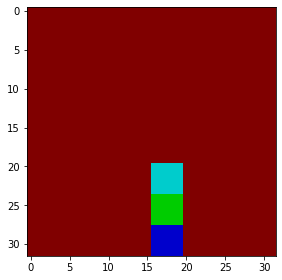

In [6]:
image = img_as_float32(io.imread(IMAGE_FILE))
image = resize(image, (own_rel.IMAGE_SIZE, own_rel.IMAGE_SIZE), anti_aliasing=True)

model = own_rel.own_rel()
model.load_weights(MODEL)

io.imshow(image)
io.show()

Der nächste Schritt soll nun sein, die im Bild vorhandenen Elemente automatisch zu annotieren. Benutzen Sie hierfür die Funktion __annotate_image_parts__ aus dem bereits importierten __lime_aleph__ package mit den benötigten Parametern:

In [7]:
#[SOLUTION]

annotated_image = la.annotate_image_parts(image, model, OUTPUT_DIR, N)

Running LIME...


/home/johannes/anaconda3/envs/ki-campus/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


True class of the image is:  1
Starting the explanation generation process. This may take a while.


  0%|          | 0/1000 [00:00<?, ?it/s]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Intercept -0.30768453627275416
Prediction_local [0.42866597]
Right: 0.023822423
Intercept 1.3076845418844525
Prediction_local [0.57133402]
Right: 0.9761776
Number of superpixels: 64
Annotating the superpixels...
Weight of sp:  44 is:  0.12966727143571175
Weight of sp:  60 is:  0.12455642892864707
Weight of sp:  52 is:  0.11465201908471384
Weight of sp:  28 is:  -0.05044375574873537
Weight of sp:  59 is:  -0.04373004856099038
Weight of sp:  3 is:  -0.040807283548354
Weight of sp:  33 is:  -0.04000379151943676
Weight of sp:  27 is:  -0.03999137835157025
Weight of sp:  62 is:  -0.03946291830788788
Weight of sp:  49 is:  -0.03695378517343034
Weight of sp:  20 is:  -0.03349757563408812
Weight of sp:  46 is:  -0.032755356607623014
Weight of sp:  35 is:  -0.03154148550291033
Weight of sp:  53 is:  -0.031101338014403592
Weight of sp:  61 is:  -0.030931118398504872
Weight of sp:  6 is:  -0.03026891402728769
Weight of sp:  22 is:  -0.029847200169061748
Weight of sp:  17 is:  -0.02969406684811622

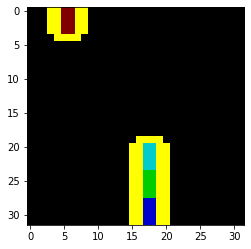

In [8]:
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

true_class = 1

temp, mask = annotated_image.explanation.get_image_and_mask(true_class, positive_only=True, num_features=4, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

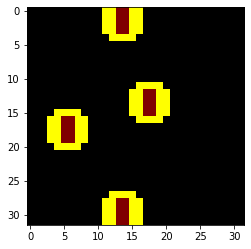

In [9]:
negative_class = 0

temp, mask = annotated_image.explanation.get_image_and_mask(negative_class, positive_only=True, num_features=4, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

Nachdem das Bild nun annotiert ist (als Annotation wurden auch die Gewichte von LIME für die einzelnen Elemente gefunden), können wir nun die wichtigsten __K__ Bildelemente mit der Funktion __find_important_parts__ finden. Anschließend können Sie auch die Relationen zwischen den Bildteilen mit der Funktion __find_spatial_relations__ finden lassen:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


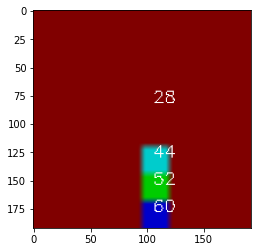

In [10]:
#[SOLUTION]

important_superpixels, labeled_image = la.find_important_parts(annotated_image, 4)

plt.imshow(labeled_image)

In [13]:
relations, graph = la.find_spatial_relations(important_superpixels)

// Graph of spatial relations
digraph {
	44 [label=44]
	60 [label=60]
	52 [label=52]
	28 [label=28]
	60 -> 44 [label=bottom_of]
	52 -> 44 [label=under]
	52 -> 44 [label=bottom_of]
	28 -> 44 [label=top_of]
	44 -> 60 [label=top_of]
	52 -> 60 [label=on]
	52 -> 60 [label=top_of]
	28 -> 60 [label=top_of]
	44 -> 52 [label=on]
	44 -> 52 [label=top_of]
	60 -> 52 [label=under]
	60 -> 52 [label=bottom_of]
	28 -> 52 [label=top_of]
	44 -> 28 [label=bottom_of]
	60 -> 28 [label=bottom_of]
	52 -> 28 [label=bottom_of]
}


Die Liste, welche von der Funktion zum Finden von Relationen zurückgegeben wurde, beinhaltet Objekte vom Typ __Relation__. Als nächstes geben wir alle gefundenen Relationen aus:

In [14]:
for rel in relations:
    print(rel)

Relation: 60 -- bottom_of --> 44
Relation: 52 -- under --> 44
Relation: 52 -- bottom_of --> 44
Relation: 28 -- top_of --> 44
Relation: 44 -- top_of --> 60
Relation: 52 -- on --> 60
Relation: 52 -- top_of --> 60
Relation: 28 -- top_of --> 60
Relation: 44 -- on --> 52
Relation: 44 -- top_of --> 52
Relation: 60 -- under --> 52
Relation: 60 -- bottom_of --> 52
Relation: 28 -- top_of --> 52
Relation: 44 -- bottom_of --> 28
Relation: 60 -- bottom_of --> 28
Relation: 52 -- bottom_of --> 28


Der Name beschreibt das Prädikat der räumlichen Relation. Die weiteren Informationen beschreiben die Indices der Start- und Zielelemente der Relation innerhalb des Bildes. Wir können uns weiterhin den Relations-Graphen ausgeben lassen:

In [16]:
graph.render('relations-graph.gv', view=True)

'relations-graph.gv.pdf'

Nun wollen wir das perturbierte Datenset für LIME-Aleph generieren lassen. Benutzen Sie hierzu die Funktion __perturb_instance__ mit den erforderlichen Parametern. Lassen Sie sich auch ausgeben, wie viele Instanzen im neuen Datenset sind (Es wird eine Liste mit Instanzen zurückgegeben).

In [17]:
#[SOLUTION]
perturbed_dataset = la.perturb_instance(annotated_image, relations, model, T)
print("Number of perturbed instances:", len(perturbed_dataset))

/home/johannes/anaconda3/envs/ki-campus/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Number of perturbed instances: 17


In [18]:
for idx in annotated_image.superpixels:
    print(vars(idx))

{'id': 44, 'name': 'sp_44', 'color': 'darkturquoise', 'size': 16, 'lime_weight': 0.12966727143571175, 'x_coord': 17.5, 'y_coord': 21.5}
{'id': 60, 'name': 'sp_60', 'color': 'mediumblue', 'size': 16, 'lime_weight': 0.12455642892864707, 'x_coord': 17.5, 'y_coord': 29.5}
{'id': 52, 'name': 'sp_52', 'color': 'lime', 'size': 16, 'lime_weight': 0.11465201908471384, 'x_coord': 17.5, 'y_coord': 25.5}
{'id': 28, 'name': 'sp_28', 'color': 'maroon', 'size': 16, 'lime_weight': -0.05044375574873537, 'x_coord': 17.5, 'y_coord': 13.5}
{'id': 59, 'name': 'sp_59', 'color': 'maroon', 'size': 16, 'lime_weight': -0.04373004856099038, 'x_coord': 13.5, 'y_coord': 29.5}
{'id': 3, 'name': 'sp_3', 'color': 'maroon', 'size': 16, 'lime_weight': -0.040807283548354, 'x_coord': 13.5, 'y_coord': 1.5}
{'id': 33, 'name': 'sp_33', 'color': 'maroon', 'size': 16, 'lime_weight': -0.04000379151943676, 'x_coord': 5.5, 'y_coord': 17.5}
{'id': 27, 'name': 'sp_27', 'color': 'maroon', 'size': 16, 'lime_weight': -0.0399913783515

Das ILP-Framework Aleph benötigt mehrere Hilfsdateien, die mit der Funktion __write_aleph_files__ erzeugt werden. Rufen Sie diese Funktion auf. Es sollen alle räumlichen Relationen verwendet werden! Zur Verfügung stehen folgende Relationen: *left_of*, *right_of*, *top_of*, *bottom_of*, *on*, *under*

In [19]:
#[SOLUTION]
used_relations = None # 'None' if you want to allow all relations, otherwise list with following possibilities: ["left_of", "right_of", "top_of", "bottom_of", "on", "under"]
la.write_aleph_files(annotated_image, perturbed_dataset, used_relations, OUTPUT_DIR, NOISE)

Writing the input files for Aleph...
Done.


Schlussendlich muss nun der Induktionsprozess von Aleph angestoßen werden. Dieser Schritt (mit der Funktion __run_aleph__) gibt auch die gefundene Erklärung aus:

In [20]:
#[SOLUTION]
la.run_aleph(OUTPUT_DIR)

[{}]
[{}]
[{}]
[{}]
[{}]
The explanation was saved to '../output/explanation.txt'


Die Erklärung in Form von Regeln kann nun im angegebenen Ordner in der Datei *explanation.txt* gefunden und interpretiert werden. Wir lesen nun diese Datei aus:

In [21]:
with open(OUTPUT_DIR + "explanation.txt", 'r') as f:
    print(f.read())

true_class(A) :-
   contains(B,A), has_color(B,mediumblue), contains(C,A), has_color(C,lime), 
   top_of_in_ex(C,B,A), contains(D,A), top_of_in_ex(D,C,A).



# Interpretation 
...


true_class(A) :-
   contains(B,A), has_color(B,mediumblue), contains(C,A), has_color(C,lime), 
   top_of_in_ex(C,B,A).

## Interpretierte Regel

true_class(Turm) :-
   contains(Blau,Turm), has_color(Blau,mediumblue), contains(Grün,Turm), has_color(Grün,lime), 
   top_of_in_ex(Grün,Blau,Turm).

übersetzt in Satz
Turm ist wahr wenn gilt: Der blaue Klotz gehört zu einem Turm, ... 

[Bild]




